=== Task ===
1.With the iris data given in class, implement train_test_split from scratch.

2.Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3.Calculate time taken to fit your models using different training methods.

4.Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5.Simply, use classification_report from sklearn.metrics to evaluate your models.

6.Discuss your results ie. training losses of the three methods and time taken to fit models.

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

def train_test_split(X,y):
    idx = np.arange(0,len(X),1)
    np.random.shuffle(idx)
    idx_train = idx[0:int(.7*len(idx))]
    idx_test = idx[len(idx_train):len(idx)]
    X_train = X[idx_train]
    X_test = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [2]:
#data split
idx = np.arange(0,len(X),1)

# add intercept to our X
intercept = np.ones((X_train.shape[0],1))
X_train = np.concatenate((intercept,X_train),axis = 1)

intercept = np.ones((X_test.shape[0],1))
X_test = np.concatenate((intercept,X_test),axis = 1)

In [3]:
k = len(set(y))
m = X_train.shape[0]
n = X_train.shape[1]
Y_train_encoded = np.zeros((m,k))
for each_class in range(k):
    cond = y_train == each_class
    Y_train_encoded[np.where(cond), each_class]=1

<function matplotlib.pyplot.show(*args, **kw)>

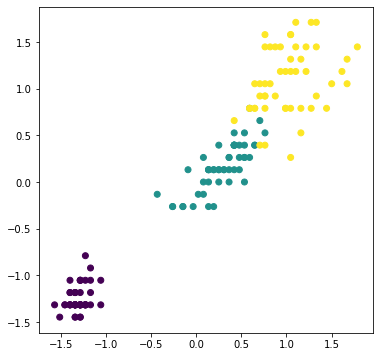

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],label = "class 0" , c=y)
plt.show

In [9]:
import time
class LogisticRegression:
    def __init__(self,k,n,method,alpha = 0.001,max_iter = 10000):
        self.method = method
        self.alpha = alpha
        self.max_iter = max_iter  
        self.k = k
        self.n = n   
        
        if self.method != "sto" and self.method != "mini-batch" and self.method != "batch":
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        else :
            pass
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
    
    def sto(self, X,Y):
        list_of_used_ix = []
        random_inX = np.random.randint(X.shape[0])
        while random_inX in list_of_used_ix:
            random_inX = np.random.randint(X.shape[0])
        data_X_train = X[random_inX, :].reshape(1, -1)
        data_Y_train = Y[random_inX]
        list_of_used_ix.append(random_inX)
        return data_X_train,data_Y_train

    def mini_batch(self, X,Y):
        batch_size = int(0.3 * X.shape[0])
        ix = np.random.randint(0, X.shape[0])
        batch_X = X[ix:ix+batch_size]
        batch_Y = Y[ix:ix+batch_size]
        return batch_X,batch_Y
    
    def fit(self,X,Y):
        self.W = np.random.rand(self.n, self.k)
        time_start = time.time()
        self.losses = []     
        for i in range(self.max_iter):
            if self.method == "sto":                
                X_train , Y_train  = self.sto(X,Y)
            elif self.method == "mini-batch":
                X_train , Y_train  = self.mini_batch(X,Y)
            elif self.method == "batch":
                X_train , Y_train = X,Y
            
            loss, grad =  self.gradient(X_train , Y_train)
            self.losses.append(loss)
            self.W = self.W - self.alpha * grad
            if i % 500 == 0:
                print(f"Loss at iteration {i}", loss)
        print(f"time taken: {time.time() - time_start}")

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)    



Loss at iteration 0 1.2381719473477892
Loss at iteration 500 0.17709960593387167
Loss at iteration 1000 0.1292244048300305
Loss at iteration 1500 0.11023586671991495
Loss at iteration 2000 0.09983784045385977
Loss at iteration 2500 0.09321060441287912
Loss at iteration 3000 0.08859104807924105
Loss at iteration 3500 0.0851733022266685
Loss at iteration 4000 0.08253425150239302
Loss at iteration 4500 0.08042952679524688
Loss at iteration 5000 0.07870779002245314
Loss at iteration 5500 0.07727017234070273
Loss at iteration 6000 0.07604929218058222
Loss at iteration 6500 0.07499762187688933
Loss at iteration 7000 0.07408066826103173
Loss at iteration 7500 0.07327278813238355
Loss at iteration 8000 0.07255452042658427
Loss at iteration 8500 0.07191082918800883
Loss at iteration 9000 0.07132991360556393
Loss at iteration 9500 0.07080238227695392
time taken: 0.5201184749603271
=========Classification report=======
Report:                precision    recall  f1-score   support

           0  

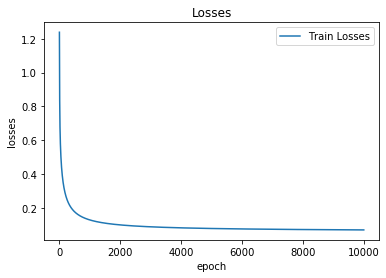

In [10]:
from sklearn.metrics import classification_report
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 0.8703582599047591
Loss at iteration 500 0.32337332626174586
Loss at iteration 1000 0.22330908864422772
Loss at iteration 1500 0.18740002231902514
Loss at iteration 2000 0.13816123043241257
Loss at iteration 2500 0.14674697174627085
Loss at iteration 3000 0.14589736508715162
Loss at iteration 3500 0.10182148516093546
Loss at iteration 4000 0.1305537760507376
Loss at iteration 4500 0.38789687363106035
Loss at iteration 5000 0.0706952232839791
Loss at iteration 5500 0.057927210724957975
Loss at iteration 6000 0.11351950727889694
Loss at iteration 6500 0.0627082171803373
Loss at iteration 7000 0.08062428954614777
Loss at iteration 7500 0.1133384581590732
Loss at iteration 8000 0.10721240925943712
Loss at iteration 8500 0.1796980982849747
Loss at iteration 9000 0.14955580389143247
Loss at iteration 9500 0.1436815812101257
time taken: 0.42415761947631836
=========Classification report=======
Report:                precision    recall  f1-score   support

           0    

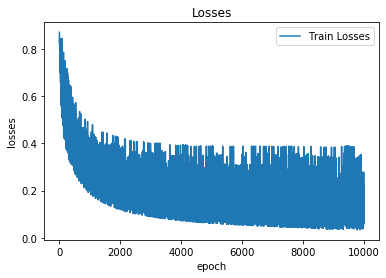

In [11]:
from sklearn.metrics import classification_report
model = LogisticRegression(k, X_train.shape[1], "mini-batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 0.8052481202708826
Loss at iteration 500 0.4712878596206746
Loss at iteration 1000 0.7592375876994445
Loss at iteration 1500 0.44891366761904294
Loss at iteration 2000 0.4861901526951083
Loss at iteration 2500 0.510422959873793
Loss at iteration 3000 0.49318858891007605
Loss at iteration 3500 0.9680196790257571
Loss at iteration 4000 0.2854013120647908
Loss at iteration 4500 0.6799438842484512
Loss at iteration 5000 0.8381496976306275
Loss at iteration 5500 0.7711226939040524
Loss at iteration 6000 0.7954041630902804
Loss at iteration 6500 0.745883240945169
Loss at iteration 7000 0.7070633460954184
Loss at iteration 7500 0.6189265605716633
Loss at iteration 8000 0.5996896314988924
Loss at iteration 8500 0.2120070168623555
Loss at iteration 9000 0.6687919764519338
Loss at iteration 9500 0.6474242664259598
time taken: 0.39235424995422363
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1

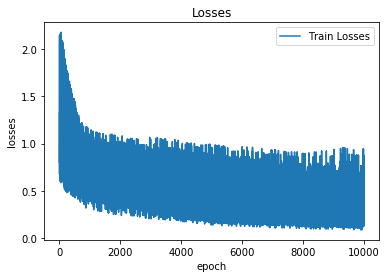

In [17]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [13]:
model = LogisticRegression(k, X_train.shape[1], "omg")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".

6.Discuss your results ie. training losses of the three methods and time taken to fit models.

Method : Batch 
The training losses graph of batch method is the most smoothly but the time taken is the most at 0.52 s because this method uses the data every row.

Method : Sto
The training losses graph of Sto method is every rough but the time taken is lowest at 0.39 s because use data each a row and take more steps. 

Method : Mini-batch
The training losses graph of mini-batch method is rough more than batch, the time taken is at the second, more than the Sto method but less than batch.
because use data each of set and also take the steps.